In [8]:
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

In [33]:
data = pd.read_csv('ex1/ex1data2.txt', header=None)
data.columns = ['size', 'bedrooms_c', 'price']

In [34]:
data[:5]

,size,bedrooms_c,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [35]:
def normalize(feature):
    return (feature - np.mean(feature)) / np.std(feature)

In [37]:
data['size'] = normalize(data['size'])
data[:5]

,size,bedrooms_c,price
0,0.131415,3,399900
1,-0.509641,3,329900
2,0.507909,3,369000
3,-0.743677,2,232000
4,1.271071,4,539900


### Get sample and target

In [38]:
X = pd.DataFrame({
    'x0': np.ones(shape=(data.shape[0],)), 
    'x1': data['size'],
    'x2': data['bedrooms_c']
})
X[:5]

,x0,x1,x2
0,1.0,0.131415,3
1,1.0,-0.509641,3
2,1.0,0.507909,3
3,1.0,-0.743677,2
4,1.0,1.271071,4


In [39]:
y = pd.DataFrame({'y': data['price']})
y[:5]

,y
0,399900
1,329900
2,369000
3,232000
4,539900


In [40]:
thetha = np.zeros(shape=(3))
thetha

array([ 0.,  0.,  0.])

In [41]:
def J(X, y, thetha):
    m = X.shape[0]
    return X.dot(thetha).sub(y['y']).pow(2).sum() / (2 * m)

In [42]:
J(X, y, thetha)

65591548106.457443

In [53]:
def gradient_descent_v(X, y, thetha, alpha, iterations):
    m = X.shape[0]
    for i in xrange(iterations):
        h = X.dot(thetha)
        loss = h.sub(y['y'])
        gradient = X.transpose().dot(loss) / m
        thetha = thetha - alpha * gradient
    return thetha, J(X, y, thetha)

In [54]:
iterations = 50
alpha = 0.01

In [58]:
result = gradient_descent_v(X, y, thetha, alpha, iterations)
print result[0]
print result[1]

x0    31659.132093
x1    28105.854056
x2    95060.712280
dtype: float64
4872727695.03


In [65]:
iter_values = np.arange(51)
j_values = [gradient_descent_v(X, y, thetha, alpha, i)[1] for i in iter_values]

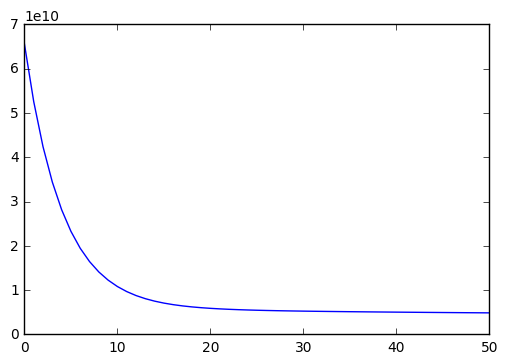

In [67]:
plot.plot(iter_values, j_values)